In [1]:
# import statements

%matplotlib inline
import os
import fiona
import pprint
import IPython
import numpy as np
import mpl_toolkits
import pandas as pd
import geopandas as gpd
from geopandas import GeoSeries, GeoDataFrame
from shapely.geometry import Point
import mapclassify
!pip install matplotlib-scalebar
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib_scalebar.scalebar import ScaleBar
import cartopy.crs as ccrs
import cartopy.feature as cf

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.8.0/lib/python3.8/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.8.0/lib/python3.8/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Defaulting to user installation because normal site-packages is not writeable


In [2]:
# check that tornado file path is working
# NOTE: The data source for this file is FEMA and NOAA. Here is a link to an information/download page for
# the 1950-2022 U.S. tornado data: https://gis-fema.hub.arcgis.com/datasets/fedmaps::tornado-tracks-1/about. 

input_file = 'Tornado_Tracks.csv'
if os.path.exists(input_file):
    print('Input file:', input_file)
else:
    print('Fix the path')

Input file: Tornado_Tracks.csv


In [3]:
# read the file into a pandas dataframe, see what the table shows

tornadoes=pd.read_csv('Tornado_Tracks.csv')
tornadoes

,OBJECTID,om,yr,mo,dy,date,time,tz,st,stf,...,slat,slon,elat,elon,len,wid,fc,Month_Calc,Date_Calc,Shape__Length
0,1,192,1950,10,1,1950/10/01,21:00:00,3,OK,40,...,36.7300,-102.5200,36.8800,-102.3000,15.80,10,0,9,1950/10/01 04:00:00+00,32166.649032
1,2,193,1950,10,9,1950/10/09,02:15:00,3,NC,37,...,34.1700,-78.6000,34.1701,-78.5999,2.00,880,0,9,1950/10/09 04:00:00+00,17.462751
2,3,195,1950,11,20,1950/11/20,02:20:00,3,KY,21,...,37.3700,-87.2000,37.3701,-87.1999,0.10,10,0,10,1950/11/20 05:00:00+00,17.891905
3,4,196,1950,11,20,1950/11/20,04:00:00,3,KY,21,...,38.2000,-84.5000,38.2001,-84.4999,0.10,10,0,10,1950/11/20 05:00:00+00,18.016042
4,5,197,1950,11,20,1950/11/20,07:30:00,3,MS,28,...,32.4200,-89.1300,32.4201,-89.1299,2.00,37,0,10,1950/11/20 05:00:00+00,17.257657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68696,68697,621922,2022,9,28,2022/09/28,13:32:00,3,FL,12,...,28.0830,-80.8669,28.1249,-80.8841,3.00,100,0,8,2022/09/28 04:00:00+00,5623.723419
68697,68698,621923,2022,9,30,2022/09/30,10:25:00,3,NC,37,...,33.9128,-78.2882,33.9132,-78.3011,0.74,20,0,8,2022/09/30 04:00:00+00,1437.023535
68698,68699,621924,2022,9,30,2022/09/30,13:22:00,3,NC,37,...,35.3242,-76.7076,35.3325,-76.7147,0.70,12,0,8,2022/09/30 04:00:00+00,1381.027880
68699,68700,621900,2022,9,4,2022/09/04,15:44:00,3,OH,39,...,41.0210,-80.6559,41.0220,-80.6555,0.07,15,0,8,2022/09/04 04:00:00+00,154.120433


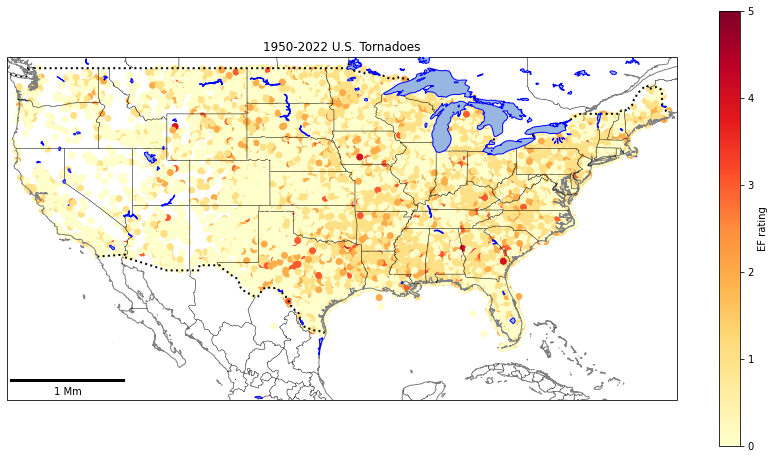

In [4]:
# create a map using cartopy
fig = plt.figure(figsize = (15, 8));
ax = plt.axes(projection = ccrs.PlateCarree());
states_provinces = cf.NaturalEarthFeature(category = 'cultural',  name = 'admin_1_states_provinces_lines', scale = '10m', linewidth = 0.5, facecolor = 'none') ;
ax.add_feature(states_provinces, edgecolor = 'black', zorder = 10) ;
ax.add_feature(cf.BORDERS, linewidth = 2, linestyle = ':', edgecolor = 'black') ;
ax.coastlines(color = "gray", resolution = '10m') ;
ax.add_feature(cf.LAKES, linewidth = 1, edgecolor = 'b', alpha = 1.0, zorder = 11) ;

# change the map extent to only show the US
ax.set_global()
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# plot the tornado touch down locations as a scatter plot and color by the magnitude (EF rating)
scatter = ax.scatter(tornadoes['slon'], tornadoes['slat'], c=tornadoes['mag'], cmap='YlOrRd', transform=ccrs.PlateCarree())
scatter.set_clim(0, 5)  # Set the color limits from 0 to 5
cbar = plt.colorbar(scatter, label='EF rating')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# set the title
ax.set_title("1950-2022 U.S. Tornadoes")

# show map
plt.show()

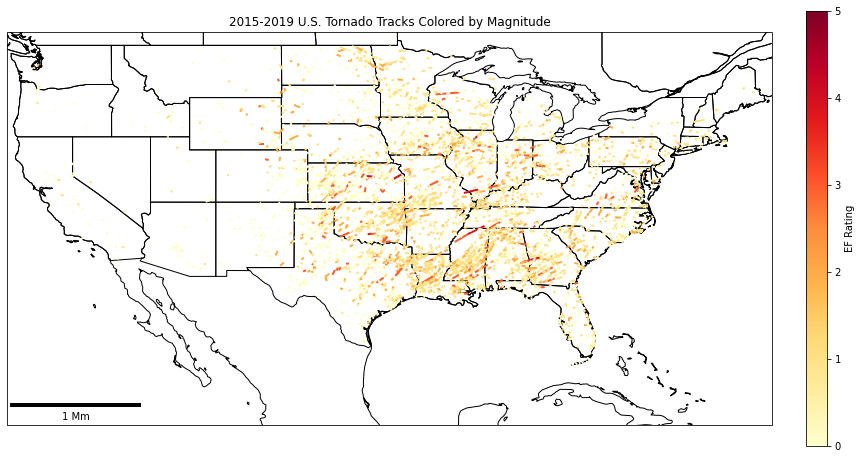

In [24]:
# recreate the map above, but only for years 2015-2019 (the census data years I have
# as well) and plot the approximate tornado tracks (using the start lat/lon and end
# lat/lon) colored by magnitude. 


# filter the dataframe
filtered_tornadoes = tornadoes[(tornadoes['yr'] >= 2015) & (tornadoes['yr'] <= 2019)]

# create the plot
fig = plt.figure(figsize = (15, 8));
ax = plt.axes(projection = ccrs.PlateCarree());
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)

# change the map extent to only show the US
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# plot tornado tracks, color-coded by magnitude
for index, row in filtered_tornadoes.iterrows():
    ax.plot([row['slon'], row['elon']], [row['slat'], row['elat']], 
            color=plt.cm.YlOrRd(row['mag'] / 5.0), transform=ccrs.PlateCarree(), linewidth=2)

# add a colorbar (for some reason this was quite difficult and kept 
# giving me negative values for magnitude, so I did some research and this
# method seemed to work)
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=0, vmax=5))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('EF Rating')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# set title
ax.set_title("2015-2019 U.S. Tornado Tracks Colored by Magnitude")

# show map
plt.show()

/cvmfs/cybergis.illinois.edu/software/conda/cybergisx/python3-0.8.0/lib/python3.8/site-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naciscdn.org/naturalearth/10m/cultural/ne_10m_admin_1_states_provinces_lakes.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


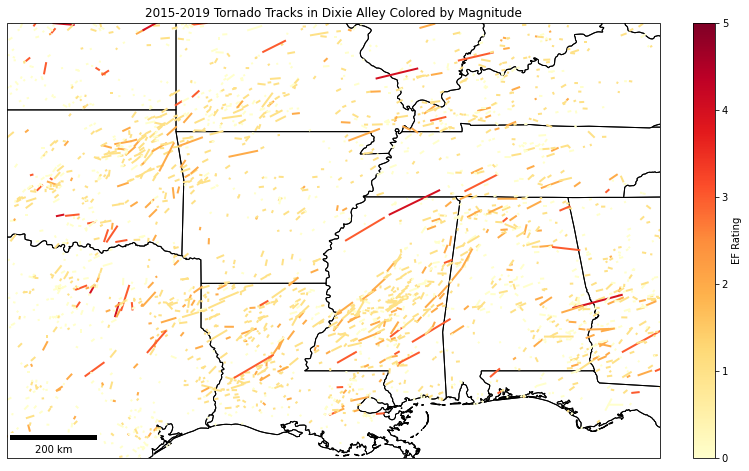

In [23]:
# map of 2015-2019 tornado tracks in dixie alley, where tornado 
# activity has become more frequent in recent decades

# these are some dixie alley boundaries I defined for purposes of this project:
# Western boundary: Around -98.5 degrees longitude (covering eastern Oklahoma)
# Eastern boundary: Around -83.5 degrees longitude (covering western Georgia)
# Northern boundary: Around 39 degrees latitude (covering the southern half of Illinois)
# Southern boundary:  Around 29 degrees latitude (covering most of southern Lousisiana) 

fig = plt.figure(figsize = (15, 8));
ax = plt.axes(projection = ccrs.PlateCarree());
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)

# change the map extent to only show Dixie Alley
ax.set_extent([-98.5, -83.5, 29, 39], crs=ccrs.PlateCarree())

# plot tornado tracks, color-coded by magnitude
for index, row in filtered_tornadoes.iterrows():
    ax.plot([row['slon'], row['elon']], [row['slat'], row['elat']], 
            color=plt.cm.YlOrRd(row['mag'] / 5.0), transform=ccrs.PlateCarree(), linewidth=2)

# add a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=0, vmax=5))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('EF Rating')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# set the title
ax.set_title("2015-2019 Tornado Tracks in Dixie Alley Colored by Magnitude")

# show map
plt.show()

In [7]:
# checking for census data file path
# NOTE: the source of this data is the Minn 2015-2019 ACS CBSA
# feature layer on ArcGIS Online (https://univofillinois.maps.arcgis.com/home/item.html?id=72140a981305432581040638a6941706#overview).
# This feature layer includes data from 
# U.S. Census Bureau. 2020. "2015 - 2019 American Community Survey 5-Year Estimates." Accessed 19 January 2021. https://data.census.gov.

input_file1 = 'census_data.csv'
if os.path.exists(input_file1):
    print('Input file:', input_file1)
else:
    print('Fix the path')

Input file: census_data.csv


In [85]:
# read into pandas dataframe

census_data = pd.read_csv(input_file1)
census_data[:5]

,FactFinder_GEOID,FIPS,Name,Latitude,Longitude,Square_Miles,Pop_per_Square_Mile,Total_Households,F__Foreign_Born_Population,Average_Household_Size,...,Women_Aged_15_to_50,F__Single_Mothers,Annual_Births_per_1K_Women,Enrolled_in_School,K_12_Enrollment,Undergrad_Enrollment,Grad_School_Enrollment,F__No_Vehicle,Shape_Length,Shape_Area
0,310M500US10100,10100,"Aberdeen, SD",45.521564,-98.696098,2839.0,15.084185,17849.0,3.7,2.32,...,9413.0,28.600000,70.0,10346.0,7245.0,2100.0,305.0,7.2,605901.573224,1.520084e+10
1,310M500US10140,10140,"Aberdeen, WA",47.140037,-123.782059,1901.0,38.284588,28722.0,4.8,2.43,...,13852.0,39.700001,52.0,14270.0,11039.0,2281.0,145.0,7.1,478868.066436,1.128942e+10
2,310M500US10180,10180,"Abilene, TX",32.449776,-99.717552,2743.0,62.219833,60931.0,5.6,2.57,...,39678.0,34.700001,61.0,44394.0,28679.0,11409.0,1748.0,5.6,461365.410992,1.005520e+10
3,310M500US10220,10220,"Ada, OK",34.729961,-96.683006,720.0,53.270832,14278.0,2.2,2.58,...,9108.0,36.099998,65.0,10295.0,6455.0,2678.0,455.0,5.3,257257.383680,2.817736e+09
4,310M500US10300,10300,"Adrian, MI",41.894753,-84.066040,750.0,131.174667,38345.0,2.3,2.43,...,20503.0,37.099998,63.0,22685.0,15831.0,4975.0,575.0,5.1,240674.963693,3.558946e+09


In [37]:
# create point geometries from latitude and longitude for each town with census data
census_data['geometry'] = census_data.apply(lambda row: Point(row['Longitude'], row['Latitude']), axis=1)

# convert to GeoDataFrame
gdf = gpd.GeoDataFrame(census_data, geometry='geometry')

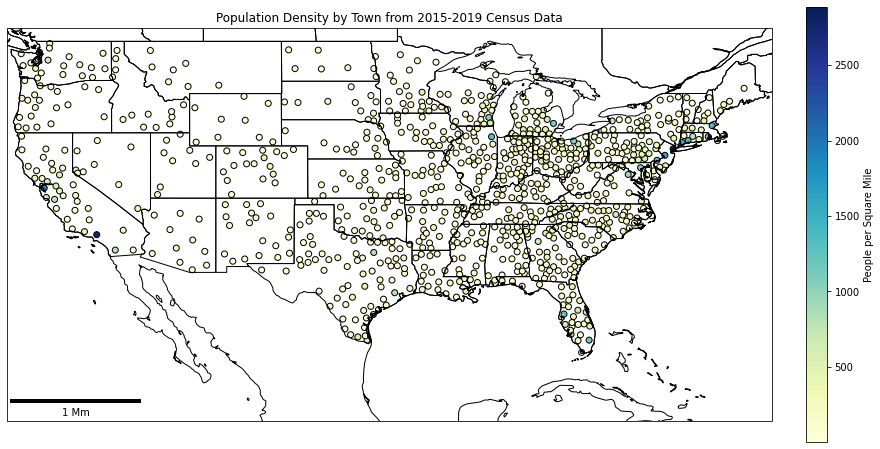

In [86]:
# create plot
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)

# plot data
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['Pop_per_Square_Mile'], cmap='YlGnBu', transform=ccrs.PlateCarree(), edgecolor='k')
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())


# add a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('People per Square Mile')

# set title
ax.set_title('Population Density by Town from 2015-2019 Census Data')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# show
plt.show()

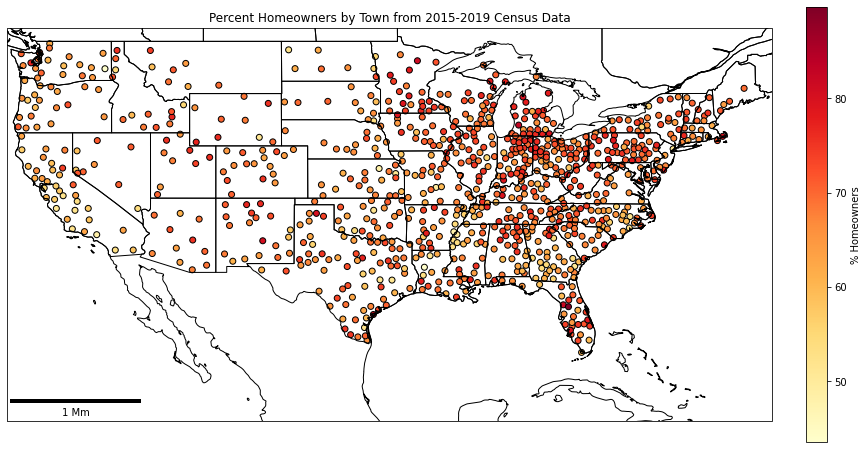

In [87]:
# create a plot
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)

# plot the data
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['F__Homeowners'], cmap='YlOrRd', transform=ccrs.PlateCarree(), edgecolor='k')
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())


# add a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('% Homeowners')

# set title
ax.set_title('Percent Homeowners by Town from 2015-2019 Census Data')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# show
plt.show()

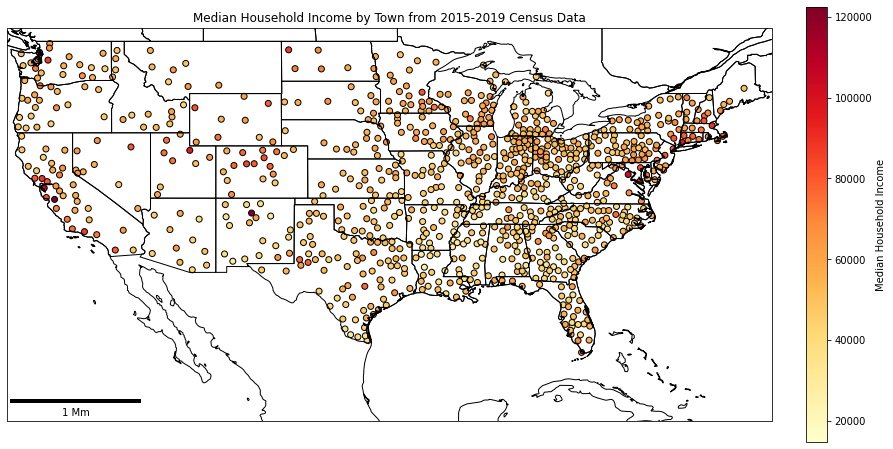

In [91]:
# create a plot
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)

# plot the data
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['Median_Household_Income'], cmap='YlOrRd', transform=ccrs.PlateCarree(), edgecolor='k')
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())


# add a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('Median Household Income')

# set title
ax.set_title('Median Household Income by Town from 2015-2019 Census Data')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# show
plt.show()

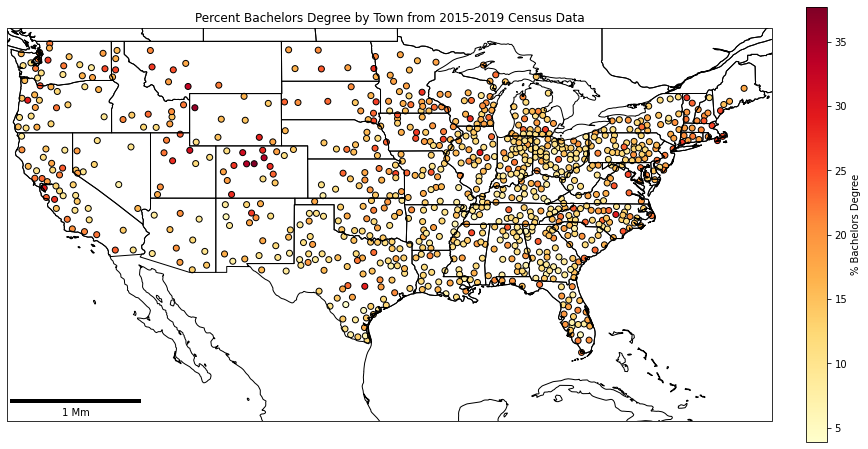

In [90]:
# create a plot
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)

# plot the data
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['F__Bachelors_Degree'], cmap='YlOrRd', transform=ccrs.PlateCarree(), edgecolor='k')
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())


# add a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('% Bachelors Degree')

# set title
ax.set_title('Percent Bachelors Degree by Town from 2015-2019 Census Data')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# show
plt.show()

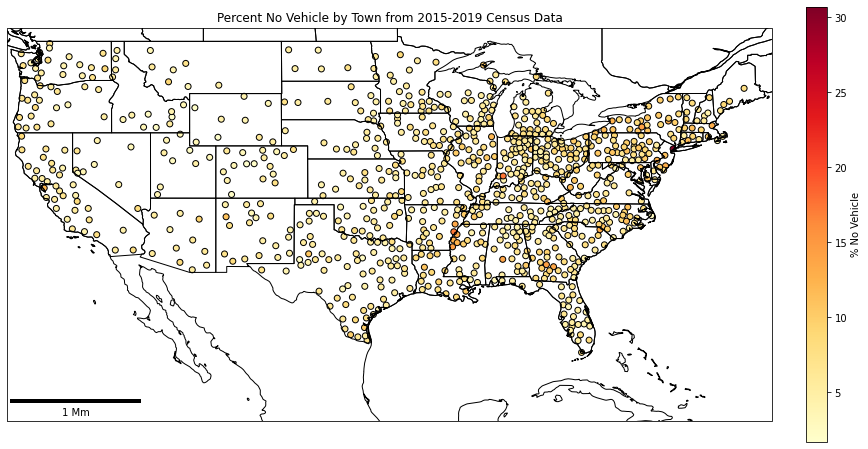

In [92]:
# create a plot
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)

# plot the data
scatter = ax.scatter(gdf.geometry.x, gdf.geometry.y, c=gdf['F__No_Vehicle'], cmap='YlOrRd', transform=ccrs.PlateCarree(), edgecolor='k')
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())


# add a colorbar
cbar = plt.colorbar(scatter, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('% No Vehicle')

# set title
ax.set_title('Percent No Vehicle by Town from 2015-2019 Census Data')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# show
plt.show()

In [93]:
# filter the data based on decided thresholds 
# to help identify towns that would likely be at high
# risk of property damage, injury, or loss of life in a tornado

filtered_gdf = gdf[
    (gdf['F__Homeowners'] <= 70) &
    (gdf['Median_Household_Income'] <= 80000) &
    (gdf['F__Bachelors_Degree'] <= 30) &
    (gdf['F__No_Vehicle'] >= 10)
]

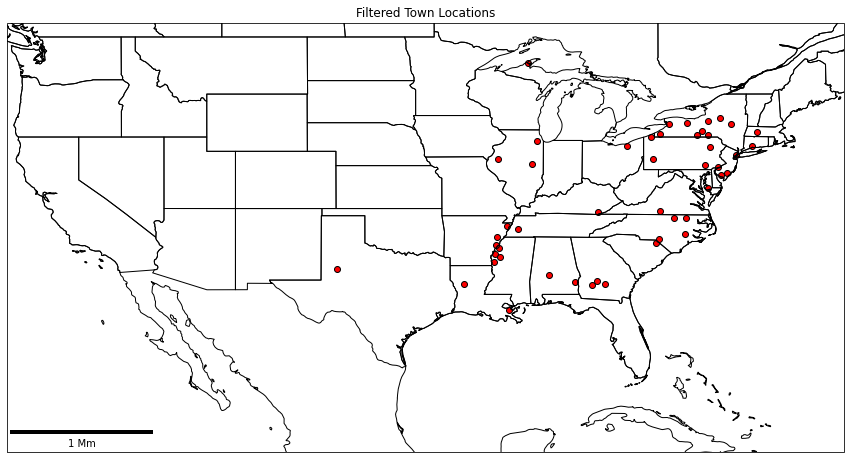

In [94]:
# sreate a plot
fig = plt.figure(figsize=(15, 8))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)

# set map extent to US
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# plot the filtered towns as points
ax.scatter(filtered_gdf.geometry.x, filtered_gdf.geometry.y, color='red', transform=ccrs.PlateCarree(), edgecolor='k')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# set title
ax.set_title('Filtered Town Locations')

# show plot
plt.show()

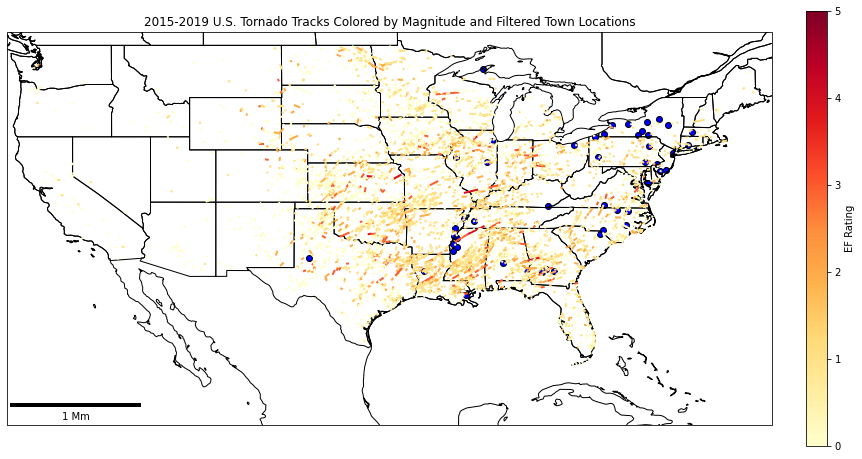

In [96]:
fig = plt.figure(figsize = (15, 8));
ax = plt.axes(projection = ccrs.PlateCarree());
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)
ax.set_extent([-125, -66.5, 20, 50], crs=ccrs.PlateCarree())

# plot the 2015-2019 tornado tracks, color-coded by magnitude
for index, row in filtered_tornadoes.iterrows():
    ax.plot([row['slon'], row['elon']], [row['slat'], row['elat']], 
            color=plt.cm.YlOrRd(row['mag'] / 5.0), transform=ccrs.PlateCarree(), linewidth=2)
    
# plot the filtered towns as points
ax.scatter(filtered_gdf.geometry.x, filtered_gdf.geometry.y, color='blue', transform=ccrs.PlateCarree(), edgecolor='k')

# add a colorbar
sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=0, vmax=5))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('EF Rating')

# add a scalebar
scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)

# set the title
ax.set_title("2015-2019 U.S. Tornado Tracks Colored by Magnitude and Filtered Town Locations")


plt.show()

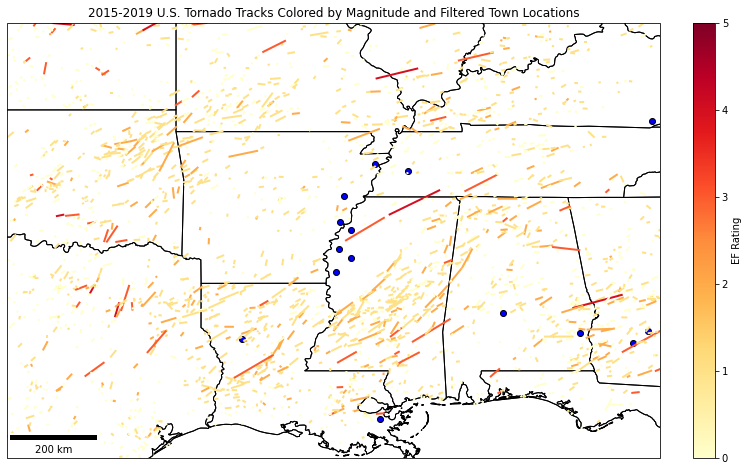

In [97]:
# same map as above except now it is zoomed in on Dixie ALley


fig = plt.figure(figsize = (15, 8));
ax = plt.axes(projection = ccrs.PlateCarree());
ax.add_feature(cf.STATES, edgecolor='black')
ax.add_feature(cf.COASTLINE)


ax.set_extent([-98.5, -83.5, 29, 39], crs=ccrs.PlateCarree())


for index, row in filtered_tornadoes.iterrows():
    ax.plot([row['slon'], row['elon']], [row['slat'], row['elat']], 
            color=plt.cm.YlOrRd(row['mag'] / 5.0), transform=ccrs.PlateCarree(), linewidth=2)
    
    
ax.scatter(filtered_gdf.geometry.x, filtered_gdf.geometry.y, color='blue', transform=ccrs.PlateCarree(), edgecolor='k')


sm = plt.cm.ScalarMappable(cmap=plt.cm.YlOrRd, norm=plt.Normalize(vmin=0, vmax=5))
sm._A = []
cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
cbar.set_label('EF Rating')


scalebar = ScaleBar(100000, location='lower left')
ax.add_artist(scalebar)


ax.set_title("2015-2019 U.S. Tornado Tracks Colored by Magnitude and Filtered Town Locations")


plt.show()